In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, f1_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB

In [2]:
#moving the data into a data frame adn displaying it
df = pd.read_csv('Fraud_Detection_Dataset.csv')
df

X1      X2      X3       X4       X5       X6       X7       X8  \
0      6.5983 -5.4256 -1.6443  13.8045   3.7169   6.7931  14.6561  11.5962   
1      7.5116 -4.3535 -4.0704  14.2800   1.8892  11.8115  14.6331   7.5008   
2      6.1407  1.3776 -6.5337  13.9074   2.5997  12.1947  14.8693  11.8861   
3      6.7580 -4.7164 -0.4525  14.2519  13.4656   5.5629  14.6345   9.9810   
4      6.1647  0.4752 -6.8146  13.7472  11.7696   8.7009  15.0317   9.4731   
...       ...     ...     ...      ...      ...      ...      ...      ...   
53854  7.9134  2.8264 -1.3249  13.8584   0.7084   3.4230  14.3366   7.9771   
53855  5.5999  3.5494  3.9867  14.0946  11.0198   9.4098  14.4216  10.6787   
53856  7.6489 -2.6305 -6.1868  13.8663  12.1585  10.1157  14.8817   6.8807   
53857  9.2547  1.2192 -8.4567  13.8496   5.5437   3.3528  13.7476   5.9087   
53858  9.8816 -4.4518 -9.1970  13.9419   0.9823   5.5828  14.7863  10.2956   

            X9      X10  ...     X192     X193     X194     X195     X196  \
0     -10.0106  18.7749  ...  12.0647   2.1140  11.1032   1.3060   7.7833   
1       8.7162  10.7818  ...  -1.5024   2.8147  18.2737  -3.1967   6.8112   
2      -9.2483  23.8771  ...  -6.9850  14.2934   8.2079  -1.7949   5.8634   
3     -12.0141  17.8304  ...  -2.9186  13.1990   3.6219  -9.7055  16.9012   
4       2.1471  17.5970  ...  12.0055   5.0098   2.3963 -14.0838   6.8654   
...        ...      ...  ...      ...      ...      ...      ...      ...   
53854 -13.7667  22.0760  ...   8.9124   1.1947  20.4620   5.3770  11.6269   
53855   0.1963   8.4779  ...  -3.1728   9.2866  26.2996  -9.6585   4.5143   
53856  -0.7198  30.0524  ...  -2.4602  16.4262  10.9469  -1.5749   9.0163   
53857  -7.5198  17.2087  ...   1.5461   8.6138   6.3588   1.3310   6.2713   
53858  -8.8532  16.7574  ...      NaN      NaN      NaN      NaN      NaN   

          X197     X198    X199    X200  Response  
0     -19.1025  13.0473  1.2374  4.9343       1.0  
1      -9.1633  11.0487  1.0700  0.0028       1.0  
2     -32.5582  23.4720  0.3236  8.3363       0.0  
3     -26.6770  24.9518 -0.2713  1.4283       0.0  
4     -11.6183  18.4232  0.7031  4.9355       0.0  
...        ...      ...     ...     ...       ...  
53854  -5.6246  13.3971  1.4181  5.6472       0.0  
53855 -32.8873  12.1554  0.2839  3.0211       0.0  
53856  -9.1896  18.7012  0.5905  2.7070       0.0  
53857   6.6636  16.2645 -0.2168  3.6538       0.0  
53858      NaN      NaN     NaN     NaN       NaN  

[53859 rows x 201 columns]

In [3]:
#checking the data frame for missing data and report which columns are missing data
df.isnull().sum()

X1          0
X2          0
X3          0
X4          0
X5          0
           ..
X197        1
X198        1
X199        1
X200        1
Response    1
Length: 201, dtype: int64

In [4]:
#this code is used to fill in the missing values
df.fillna(0, inplace=True)

In [5]:
#overview and description of data
df.describe

<bound method NDFrame.describe of            X1      X2      X3       X4       X5       X6       X7       X8  \
0      6.5983 -5.4256 -1.6443  13.8045   3.7169   6.7931  14.6561  11.5962   
1      7.5116 -4.3535 -4.0704  14.2800   1.8892  11.8115  14.6331   7.5008   
2      6.1407  1.3776 -6.5337  13.9074   2.5997  12.1947  14.8693  11.8861   
3      6.7580 -4.7164 -0.4525  14.2519  13.4656   5.5629  14.6345   9.9810   
4      6.1647  0.4752 -6.8146  13.7472  11.7696   8.7009  15.0317   9.4731   
...       ...     ...     ...      ...      ...      ...      ...      ...   
53854  7.9134  2.8264 -1.3249  13.8584   0.7084   3.4230  14.3366   7.9771   
53855  5.5999  3.5494  3.9867  14.0946  11.0198   9.4098  14.4216  10.6787   
53856  7.6489 -2.6305 -6.1868  13.8663  12.1585  10.1157  14.8817   6.8807   
53857  9.2547  1.2192 -8.4567  13.8496   5.5437   3.3528  13.7476   5.9087   
53858  9.8816 -4.4518 -9.1970  13.9419   0.9823   5.5828  14.7863  10.2956   

            X9      X10  ...     X192     X193     X194     X195     X196  \
0     -10.0106  18.7749  ...  12.0647   2.1140  11.1032   1.3060   7.7833   
1       8.7162  10.7818  ...  -1.5024   2.8147  18.2737  -3.1967   6.8112   
2      -9.2483  23.8771  ...  -6.9850  14.2934   8.2079  -1.7949   5.8634   
3     -12.0141  17.8304  ...  -2.9186  13.1990   3.6219  -9.7055  16.9012   
4       2.1471  17.5970  ...  12.0055   5.0098   2.3963 -14.0838   6.8654   
...        ...      ...  ...      ...      ...      ...      ...      ...   
53854 -13.7667  22.0760  ...   8.9124   1.1947  20.4620   5.3770  11.6269   
53855   0.1963   8.4779  ...  -3.1728   9.2866  26.2996  -9.6585   4.5143   
53856  -0.7198  30.0524  ...  -2.4602  16.4262  10.9469  -1.5749   9.0163   
53857  -7.5198  17.2087  ...   1.5461   8.6138   6.3588   1.3310   6.2713   
53858  -8.8532  16.7574  ...   0.0000   0.0000   0.0000   0.0000   0.0000   

          X197     X198    X199    X200  Response  
0     -19.1025  13.0473  1.2374  4.9343       1.0  
1      -9.1633  11.0487  1.0700  0.0028       1.0  
2     -32.5582  23.4720  0.3236  8.3363       0.0  
3     -26.6770  24.9518 -0.2713  1.4283       0.0  
4     -11.6183  18.4232  0.7031  4.9355       0.0  
...        ...      ...     ...     ...       ...  
53854  -5.6246  13.3971  1.4181  5.6472       0.0  
53855 -32.8873  12.1554  0.2839  3.0211       0.0  
53856  -9.1896  18.7012  0.5905  2.7070       0.0  
53857   6.6636  16.2645 -0.2168  3.6538       0.0  
53858   0.0000   0.0000  0.0000  0.0000       0.0  

[53859 rows x 201 columns]>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcf08a48070>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcf08a485b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcf089f7e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf08a48af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf08a48d90>],
 'means': []}

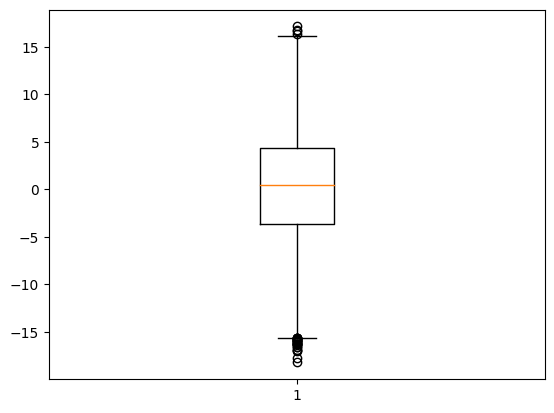

In [6]:
# creates a box plot of the column specified
plt.boxplot(df['X2'])

In [7]:
# determines the skewness of the data from column specified
df['X2'].skew()

-0.05082624925685308

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fcf0690f280>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fcf0690f370>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fcf0690f730>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fcf0690fa90>}

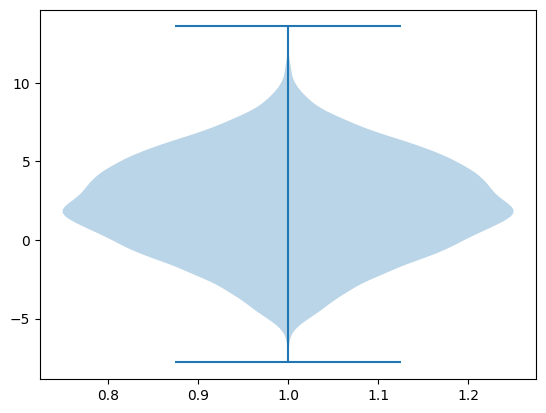

In [8]:
# creates a violin plot of column specified
plt.violinplot(df['X28'])

In [9]:
# creates a correlation matrix for the data frame
df.corr().style.background_gradient(cmap='coolwarm')

In [10]:
# creates a new df called x which includes the columns of data
x = df[df.columns[0:200]]
x

X1      X2      X3       X4       X5       X6       X7       X8  \
0      6.5983 -5.4256 -1.6443  13.8045   3.7169   6.7931  14.6561  11.5962   
1      7.5116 -4.3535 -4.0704  14.2800   1.8892  11.8115  14.6331   7.5008   
2      6.1407  1.3776 -6.5337  13.9074   2.5997  12.1947  14.8693  11.8861   
3      6.7580 -4.7164 -0.4525  14.2519  13.4656   5.5629  14.6345   9.9810   
4      6.1647  0.4752 -6.8146  13.7472  11.7696   8.7009  15.0317   9.4731   
...       ...     ...     ...      ...      ...      ...      ...      ...   
53854  7.9134  2.8264 -1.3249  13.8584   0.7084   3.4230  14.3366   7.9771   
53855  5.5999  3.5494  3.9867  14.0946  11.0198   9.4098  14.4216  10.6787   
53856  7.6489 -2.6305 -6.1868  13.8663  12.1585  10.1157  14.8817   6.8807   
53857  9.2547  1.2192 -8.4567  13.8496   5.5437   3.3528  13.7476   5.9087   
53858  9.8816 -4.4518 -9.1970  13.9419   0.9823   5.5828  14.7863  10.2956   

            X9      X10  ...     X191     X192     X193     X194     X195  \
0     -10.0106  18.7749  ...   7.9391  12.0647   2.1140  11.1032   1.3060   
1       8.7162  10.7818  ...  13.1091  -1.5024   2.8147  18.2737  -3.1967   
2      -9.2483  23.8771  ...  12.2808  -6.9850  14.2934   8.2079  -1.7949   
3     -12.0141  17.8304  ...   9.0959  -2.9186  13.1990   3.6219  -9.7055   
4       2.1471  17.5970  ...  12.7470  12.0055   5.0098   2.3963 -14.0838   
...        ...      ...  ...      ...      ...      ...      ...      ...   
53854 -13.7667  22.0760  ...   9.4038   8.9124   1.1947  20.4620   5.3770   
53855   0.1963   8.4779  ...   8.4240  -3.1728   9.2866  26.2996  -9.6585   
53856  -0.7198  30.0524  ...   8.4981  -2.4602  16.4262  10.9469  -1.5749   
53857  -7.5198  17.2087  ...   9.3624   1.5461   8.6138   6.3588   1.3310   
53858  -8.8532  16.7574  ...   0.0000   0.0000   0.0000   0.0000   0.0000   

          X196     X197     X198    X199    X200  
0       7.7833 -19.1025  13.0473  1.2374  4.9343  
1       6.8112  -9.1633  11.0487  1.0700  0.0028  
2       5.8634 -32.5582  23.4720  0.3236  8.3363  
3      16.9012 -26.6770  24.9518 -0.2713  1.4283  
4       6.8654 -11.6183  18.4232  0.7031  4.9355  
...        ...      ...      ...     ...     ...  
53854  11.6269  -5.6246  13.3971  1.4181  5.6472  
53855   4.5143 -32.8873  12.1554  0.2839  3.0211  
53856   9.0163  -9.1896  18.7012  0.5905  2.7070  
53857   6.2713   6.6636  16.2645 -0.2168  3.6538  
53858   0.0000   0.0000   0.0000  0.0000  0.0000  

[53859 rows x 200 columns]

In [11]:
# selects the response column and defines it as dataset of Y
y = df['Response']
y

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
53854    0.0
53855    0.0
53856    0.0
53857    0.0
53858    0.0
Name: Response, Length: 53859, dtype: float64

In [12]:
# counts and displays how many times each unique value occurs
y.value_counts()

Response
0.0    47781
1.0     6078
Name: count, dtype: int64

In [13]:
#this converts x into a scaled version of x where mean is 0 and std is 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


In [12]:
#scaled data for x
X_scaled

array([[-0.7809525 , -1.05050535,  0.26621318, ..., -0.59112893,
         0.50188832,  0.37653567],
       [-0.04135477, -0.85595852, -0.13958648, ..., -1.09854965,
         0.33027094, -0.70889378],
       [-1.15152068,  0.18402597, -0.55160836, ...,  2.05557817,
        -0.43493345,  1.12532021],
       ...,
       [ 0.06983188, -0.5432972 , -0.49358442, ...,  0.8443289 ,
        -0.16130932, -0.1136959 ],
       [ 1.37022172,  0.15528218, -0.87325741, ...,  0.22567981,
        -0.98894798,  0.09469598],
       [ 1.87789042, -0.87379636, -0.99708309, ..., -3.9036829 ,
        -0.76668604, -0.70951006]])

In [14]:
#splitting the the x scaled data into a 30,70 test and training split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=21, shuffle=True)

accuracy of model at each class:
[[11405  2929]
 [  442  1382]]

Accuracy: 0.7913726946404258
Precision: 0.3205752725585711
Recall: 0.7576754385964912
F1 Score: 0.4505297473512633
ROC curve and AUC score:



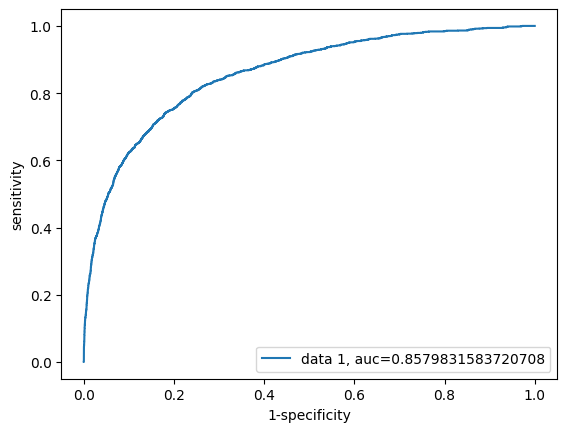

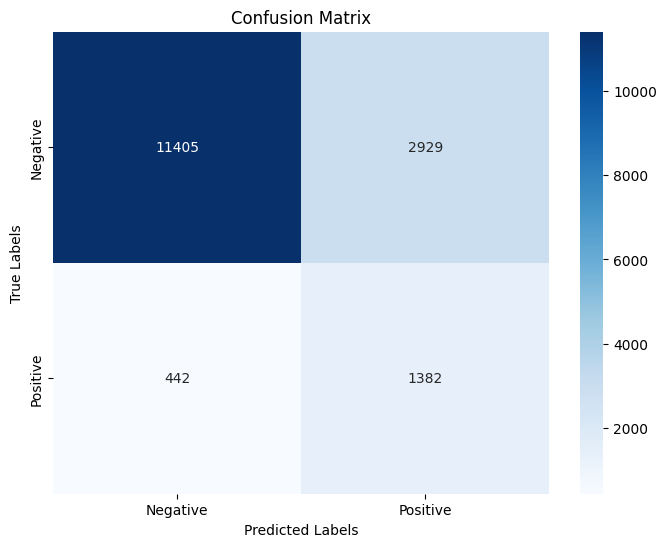

In [15]:

# application of SMOTE regression model
smote = SMOTE(random_state=21)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


model_logreg = LogisticRegression().fit(X_train_smote, y_train_smote)


#intercept value for the regression model
model_logreg.intercept_

#impact on prediction of the model
model_logreg.coef_

# this is used to see how well the model can predict the variable on new data
y_pred = model_logreg.predict(X_test)

# shows the accuracy of the model at each class
print("accuracy of model at each class:")
print(confusion_matrix(y_test, y_pred))
print()
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', 'weighted' to calculate metrics globally
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', 'weighted' to calculate metrics globally
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', 'weighted' to calculate metrics globally
print("F1 Score:", f1)

# models ability to distinguish the classes using ROC curve and AUC score
print("ROC curve and AUC score:\n")
y_pred_proba = model_logreg.predict_proba(X_test)[::,1]
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("1-specificity")
plt.ylabel("sensitivity")
plt.legend(loc=4)
plt.show()

labels = ['Negative', 'Positive']  # Adjust labels as per your classification tasks

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.8876235195178359
Precision: 1.0
Recall: 0.0003117206982543641
F1 Score: 0.0006232471174820816
AUC Score: 0.8180760778176942


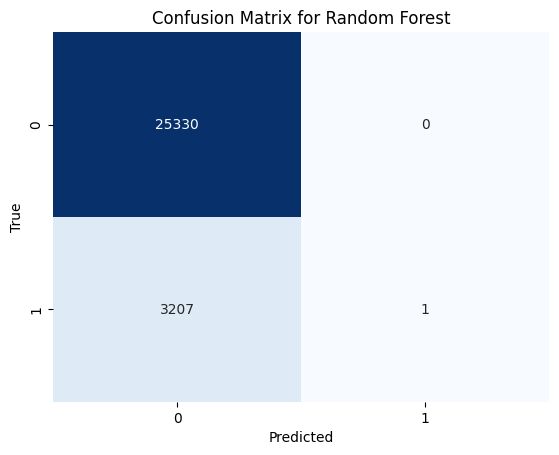

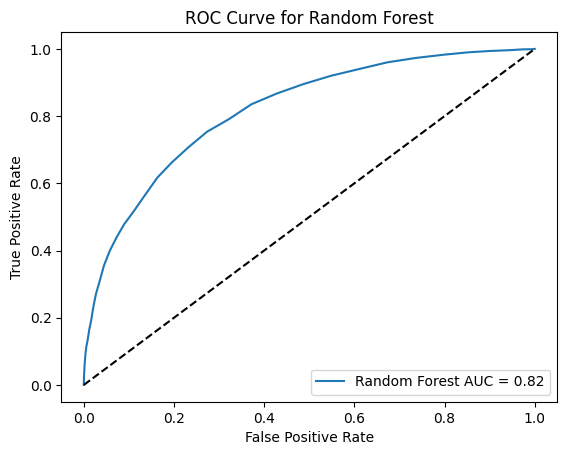

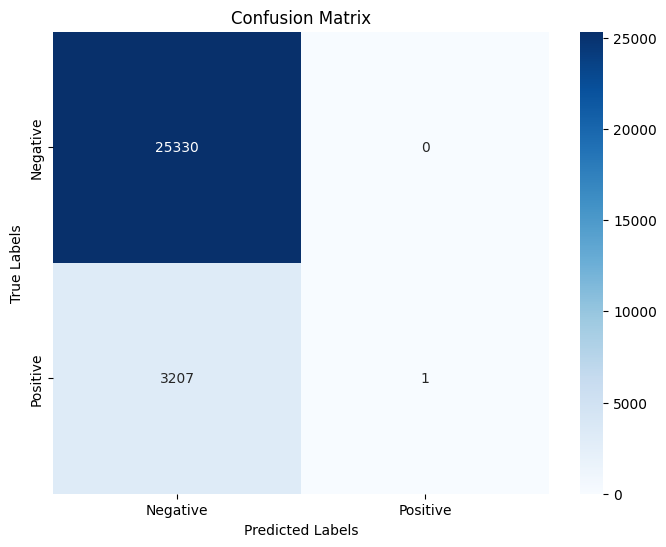

In [ ]:
# Random forest model


# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=21)  # You can adjust the number of trees with n_estimators

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate precision, recall, f1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print(f"Precision: {precision}\nRecall: {recall}\nF1 Score: {f1}")

# AUC score
y_pred_proba = rf_model.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc}")

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# ROC Curve for Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

labels = ['Negative', 'Positive']  # Adjust labels as per your classification tasks

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.8541279861368981
Precision: 0.3183367416496251
Recall: 0.25603070175438597
F1 Score: 0.2838043147979337
AUC Score: 0.7173390726624709


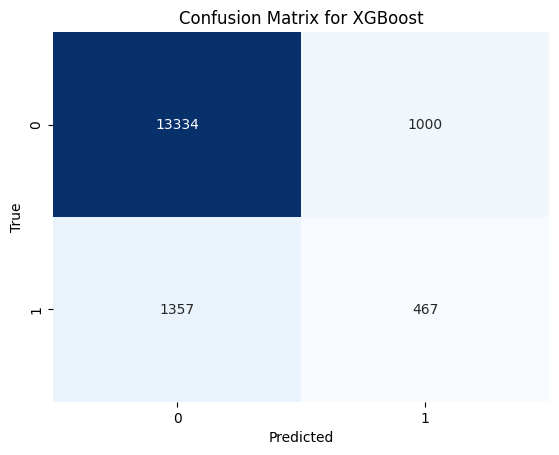

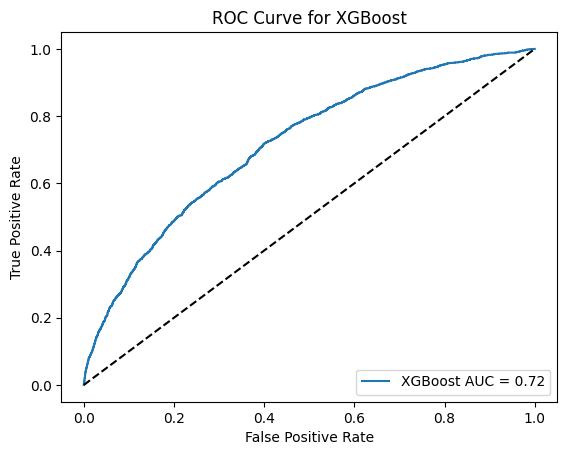

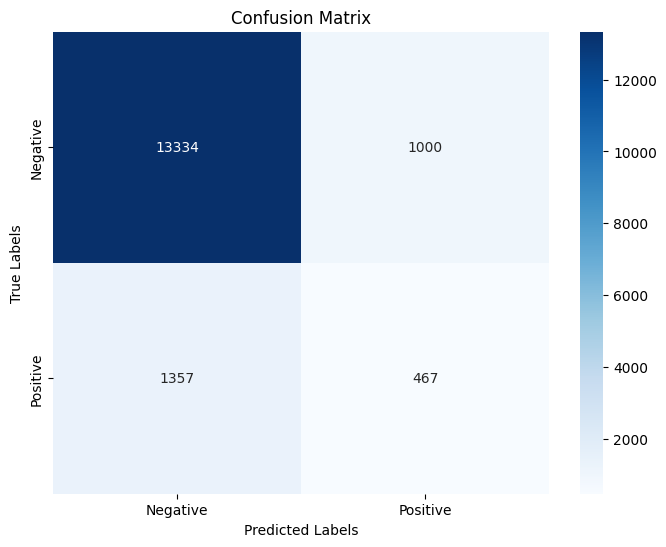

In [16]:
#GBM model


# Create a model of the GBM
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#  Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#  Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

#  F1 Score
f1 = metrics.f1_score(y_test, y_pred)
print("F1 Score:", f1)

# AUC score
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# Confusion Matrix for GBM
cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost')
plt.show()

# ROC Curve for GBM
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost AUC = {auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

labels = ['Negative', 'Positive']  # Adjust labels as per your classification tasks

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.8564178734991954
Precision: 0.20192307692307693
Recall: 0.09210526315789473
F1 Score: 0.12650602409638553
AUC Score: 0.6047196932700805


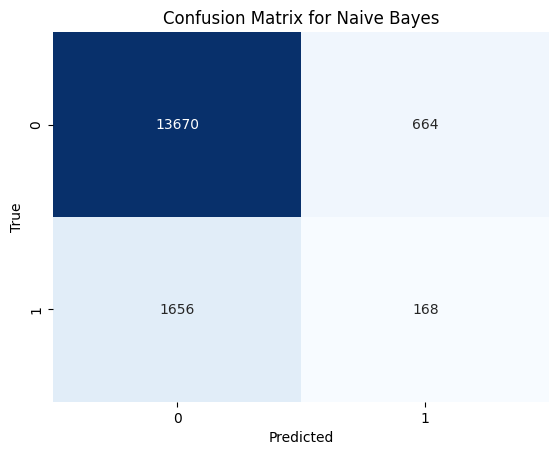

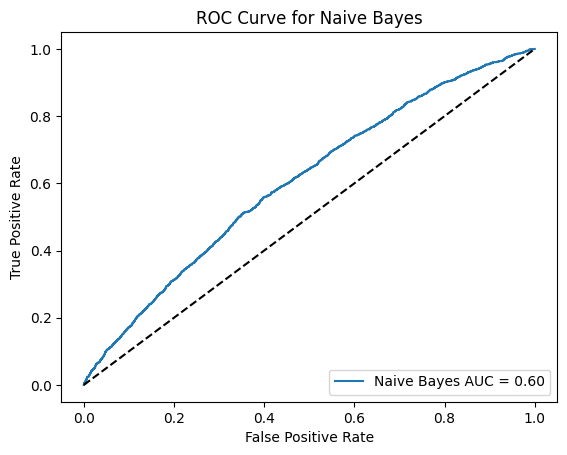

In [17]:
# Naive Bayes
# Naive Bayes Model initialization and training
nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC Score: {auc_score}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'Naive Bayes AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

Testing Set:

In [18]:
#create data frame for test
test = pd.read_csv('Fraud_detection_Test_Perturbed.csv')
test

X1      X2       X3       X4       X5      X6       X7       X8  \
0     8.1620  4.7486  -4.8986  13.9712  11.6354  5.3912  14.8232  13.4055   
1     6.7998  3.2456  -2.3653  13.9082   1.1972  4.4977  14.2080   8.5397   
2     6.9590  3.7005   3.6673  13.9577  17.1434  8.3946  14.4767   8.1639   
3     5.7275  1.1631   1.9509  13.8399   9.8722  8.7463  14.3652   5.5094   
4     6.5878 -4.6551  -0.9031  14.0851   2.9142  3.3105  14.3346  10.4282   
...      ...     ...      ...      ...      ...     ...      ...      ...   
1487  6.5617  4.2391 -10.0115  13.8420  -0.3464  8.8092  13.8387   7.5424   
1488  6.4203  4.9350  -3.8418  13.9313  13.5549  8.2204  14.3692  12.5330   
1489  7.7287  5.8496   2.7477  14.1269   7.9474  8.1464  14.3271   7.8116   
1490  6.8800  3.7577  -8.6607  14.2034   8.2015  6.1916  14.4313   9.9875   
1491  6.2221 -8.1653  -6.5814  14.2254   3.7683  8.1001  14.7084   6.2778   

           X9      X10  ...     X191     X192     X193     X194     X195  \
0     -1.0157  21.2025  ...  10.4580  -1.3968  10.2486  13.4016 -10.0854   
1     -1.2130   4.6169  ...   9.3562 -10.4096   6.2919  14.0581  -7.4157   
2    -15.2704  21.0835  ...   9.3781  -6.5226   6.8624  21.2809   3.9733   
3     -6.0911   3.7158  ...  10.4214  -4.2912   3.8417  15.7505  -2.1076   
4      2.2211  14.9215  ...   7.9829  13.3961  18.1237  20.8919  -9.1921   
...       ...      ...  ...      ...      ...      ...      ...      ...   
1487   4.9396  21.0532  ...  12.1459   4.8976   4.3747   4.3603  -9.9760   
1488  -0.3240  29.1361  ...   8.4560  15.7844   7.8719   3.2284   7.9453   
1489  -2.3337  -2.8907  ...   8.1429  -7.8034   5.0532  13.0705  -0.2223   
1490  -6.4661  18.4124  ...   8.8488 -12.1518   2.4749   8.0473 -10.5954   
1491 -16.3285   6.8334  ...  10.9644   4.6470   7.6938  36.6077  -1.2927   

         X196     X197     X198    X199    X200  
0     12.5881  -4.1402  13.5485  1.8939 -1.5138  
1      8.3590  -6.1441  10.2529 -0.2176  1.8525  
2      9.3417 -31.0569  17.4560  2.5783  2.1833  
3      5.1870 -16.5069  14.7507  0.0148  4.7225  
4      7.3147 -25.2384  17.1097 -0.1681  1.9935  
...       ...      ...      ...     ...     ...  
1487  10.1679 -17.2436  23.4583 -1.2988  6.9028  
1488   6.9754   0.7109  20.9365  1.1057  4.6237  
1489   6.6706 -26.5941  18.1158  0.1220  1.2590  
1490  12.6346  -5.0473  17.2927  2.0767  2.1845  
1491   5.4637   2.9244  13.1434  1.3956  4.5387  

[1492 rows x 200 columns]

In [19]:
# fill in empty data for test
test.fillna(0, inplace=True)

In [20]:
#creates data called x_test which includes x column
x_test = test[test.columns[0:200]]
x_test

X1      X2       X3       X4       X5      X6       X7       X8  \
0     8.1620  4.7486  -4.8986  13.9712  11.6354  5.3912  14.8232  13.4055   
1     6.7998  3.2456  -2.3653  13.9082   1.1972  4.4977  14.2080   8.5397   
2     6.9590  3.7005   3.6673  13.9577  17.1434  8.3946  14.4767   8.1639   
3     5.7275  1.1631   1.9509  13.8399   9.8722  8.7463  14.3652   5.5094   
4     6.5878 -4.6551  -0.9031  14.0851   2.9142  3.3105  14.3346  10.4282   
...      ...     ...      ...      ...      ...     ...      ...      ...   
1487  6.5617  4.2391 -10.0115  13.8420  -0.3464  8.8092  13.8387   7.5424   
1488  6.4203  4.9350  -3.8418  13.9313  13.5549  8.2204  14.3692  12.5330   
1489  7.7287  5.8496   2.7477  14.1269   7.9474  8.1464  14.3271   7.8116   
1490  6.8800  3.7577  -8.6607  14.2034   8.2015  6.1916  14.4313   9.9875   
1491  6.2221 -8.1653  -6.5814  14.2254   3.7683  8.1001  14.7084   6.2778   

           X9      X10  ...     X191     X192     X193     X194     X195  \
0     -1.0157  21.2025  ...  10.4580  -1.3968  10.2486  13.4016 -10.0854   
1     -1.2130   4.6169  ...   9.3562 -10.4096   6.2919  14.0581  -7.4157   
2    -15.2704  21.0835  ...   9.3781  -6.5226   6.8624  21.2809   3.9733   
3     -6.0911   3.7158  ...  10.4214  -4.2912   3.8417  15.7505  -2.1076   
4      2.2211  14.9215  ...   7.9829  13.3961  18.1237  20.8919  -9.1921   
...       ...      ...  ...      ...      ...      ...      ...      ...   
1487   4.9396  21.0532  ...  12.1459   4.8976   4.3747   4.3603  -9.9760   
1488  -0.3240  29.1361  ...   8.4560  15.7844   7.8719   3.2284   7.9453   
1489  -2.3337  -2.8907  ...   8.1429  -7.8034   5.0532  13.0705  -0.2223   
1490  -6.4661  18.4124  ...   8.8488 -12.1518   2.4749   8.0473 -10.5954   
1491 -16.3285   6.8334  ...  10.9644   4.6470   7.6938  36.6077  -1.2927   

         X196     X197     X198    X199    X200  
0     12.5881  -4.1402  13.5485  1.8939 -1.5138  
1      8.3590  -6.1441  10.2529 -0.2176  1.8525  
2      9.3417 -31.0569  17.4560  2.5783  2.1833  
3      5.1870 -16.5069  14.7507  0.0148  4.7225  
4      7.3147 -25.2384  17.1097 -0.1681  1.9935  
...       ...      ...      ...     ...     ...  
1487  10.1679 -17.2436  23.4583 -1.2988  6.9028  
1488   6.9754   0.7109  20.9365  1.1057  4.6237  
1489   6.6706 -26.5941  18.1158  0.1220  1.2590  
1490  12.6346  -5.0473  17.2927  2.0767  2.1845  
1491   5.4637   2.9244  13.1434  1.3956  4.5387  

[1492 rows x 200 columns]

In [21]:
#nan detected
nan_location = x_test.isnull().stack()[lambda x: x].index.tolist()
print(nan_location)

[]


In [22]:
#filled nan with a 0
x_test.fillna(0, inplace=True)

In [23]:
import pandas as pd

# Load your data
# test = pd.read_csv('Fraud_Detection_Test.csv')

# Assuming x_test is already defined and is where the error occurs
# Let's clean all columns in x_test that should be numeric
for col in x_test.columns:
    # Remove any unwanted characters (e.g., dashes and spaces)
    x_test[col] = x_test[col].replace(r'[^\d.-]', '', regex=True)

    # Convert the column to numeric, setting errors='coerce' will convert non-convertible values to NaN
    x_test[col] = pd.to_numeric(x_test[col], errors='coerce')

# Optionally, fill NaN values with zero or another appropriate value
x_test.fillna(0, inplace=True)

# Now you can proceed with scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ensure the scaler is fit on the training data (assuming 'x_train' is your training data features)
scaler.fit(X_train)  # Make sure x_train is previously defined and correctly processed

# Transform both training and test data
X_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Now, you can continue with using the model for prediction

In [24]:
from sklearn.preprocessing import StandardScaler

#scale the test data
scaler = StandardScaler()
scaler.fit(x)

X_train_scaled = scaler.transform(x)
x_test_scaled = scaler.transform(x_test)

In [26]:
# apply the model
y_hat = nb_model.predict(x_test_scaled)

{0.0: 1382, 1.0: 110}


<ipython-input-27-74f08fd8c547>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(predictions_summary.keys()), y=list(predictions_summary.values()), palette="viridis")


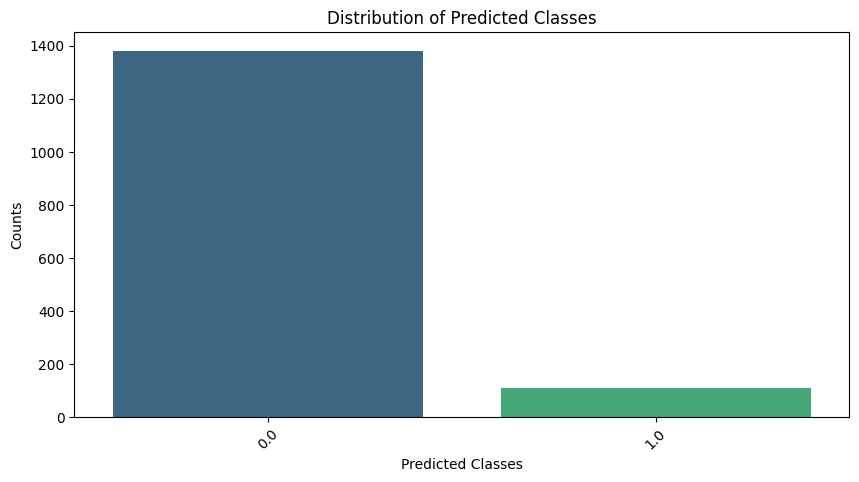

In [27]:
# count the y_hat results
import numpy as np
unique, counts = np.unique(y_hat, return_counts=True)
predictions_summary = dict(zip(unique, counts))
print(predictions_summary)
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=list(predictions_summary.keys()), y=list(predictions_summary.values()), palette="viridis")
plt.xlabel('Predicted Classes')
plt.ylabel('Counts')
plt.title('Distribution of Predicted Classes')
plt.xticks(rotation=45)
plt.show()

In [28]:
# make a df out of the y_hat predictions
predictions_test = pd.DataFrame(y_hat, columns=['Predictions'])

# Save the predictions DataFrame to a CSV file
predictions_test.to_csv('Predictions_done.csv', index=False)

In [29]:
from google.colab import files

files.download('Predictions_done.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>